##### Ensemble Methods
Ensemble:is a group of estimators (model)that are used together for prediction in classification as well as regression problems.

Ensemble:  is the belief that a committee of experts working together are more likely to be accurate than individual experts.

Ensemble: method uses n number of base estimators and combines their output to give a final prediction giving better performance and robustness than a single estimator.

For ensemble to be effective we have to ensure:
1. The base estimators are as different from each other as possible.
2. The errors made by each estimator should be different from each other (independent errors)

Bagging and Boosting are two ensemble methods.
- Bagging	                           
1. All the weak learners (models) are built in parallel i.e. independent of each other	
2. Each weak learner has equal weight in the final prediction.		
3. Samples are drawn from the original dataset with replacement to train each individual weak learner	 
4. Can help reduce variance of the mode		
5. Example: Bagging Classifier, Random Forest	

- Boosting
1. Successive weak learners to improve the accuracy from the prior learners	,  Each learner focuses on improving upon the errors of the previous one
2. More weight to those weak learners with better performance , Boosting assigns higher weights to data points that the earlier weak learner(s) misclassified
3. Subsequent samples have more of those observations which had relatively higher errors in previous weak learners	
4. Can help reduce bias of the mode
5. Example: AdaBoost, Gradient Boosting Classifier

Note : 
- weight refers to a value assigned to each data point that determines its importance during the training process of subsequent weak learners


### 1. Context

"Visit with us". company wants to enable and establish a viable business model to expand the customer base. One of the ways to expand the customer base is to introduce a new offering of packages. Currently, there are 5 types of packages the company is offering - Basic, Standard, Deluxe, Super Deluxe, King. Looking at the data of the last year, we observed that 18% of the customers purchased the packages. However, the marketing cost was quite high because customers were contacted at random without looking at the available information.The company is now planning to launch a new product i.e. Wellness Tourism Package. Wellness Tourism is defined as Travel that allows the traveler to maintain, enhance or kick-start a healthy lifestyle, and support or increase one's sense of well-being.However, this time company wants to harness the available data of existing and potential customers to make the marketing expenditure more efficient.

We need to analyze the customers' data and information to provide recommendations to the Policy Maker and Marketing Team and also build a model to predict the potential customer who is going to purchase the newly introduced travel package.

### 2. Problem
- To predict which customer is more likely to purchase the newly introduced travel package
- Which variables are most significant.
- Which segment of customers should be targeted more.

### 3. Import libraries

In [1]:
import scipy.stats as stat
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sn
import warnings

import statsmodels.api as sm

# -- sklearn library --
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier,StackingClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

# libraries to tune model, get different metric scores
from sklearn.metrics import classification_report,accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

# GridSearchCV automates the process of trying out different
# combinations of hyperparameter values for a machine learning 
# model and selecting 
# the combination that performs best based on a scoring metric

from  sklearn.model_selection  import GridSearchCV

# set the background for the graphs
plt.style.use('ggplot')

### 4. Load and understand dataset

In [2]:
df = pd.read_csv('tour_package.csv')
df_tour =df.copy()

In [3]:
# view the first 5 rows
df_tour.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [4]:
print(df_tour.shape)
print(f"There is {df_tour.shape[0]} rows and {df_tour.shape[1]} columns")


(4888, 20)
There is 4888 rows and 20 columns


In [5]:
# view the last 5 rows in dataset
df_tour.tail()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
4883,204883,1,49.0,Self Enquiry,3,9.0,Small Business,Male,3,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,1.0,Manager,26576.0
4884,204884,1,28.0,Company Invited,1,31.0,Salaried,Male,4,5.0,Basic,3.0,Single,3.0,1,3,1,2.0,Executive,21212.0
4885,204885,1,52.0,Self Enquiry,3,17.0,Salaried,Female,4,4.0,Standard,4.0,Married,7.0,0,1,1,3.0,Senior Manager,31820.0
4886,204886,1,19.0,Self Enquiry,3,16.0,Small Business,Male,3,4.0,Basic,3.0,Single,3.0,0,5,0,2.0,Executive,20289.0
4887,204887,1,36.0,Self Enquiry,1,14.0,Salaried,Male,4,4.0,Basic,4.0,Unmarried,3.0,1,3,1,2.0,Executive,24041.0


Understand Dataset
- check null values

In [6]:
# print(f"missing values\n {df_tour.isnull().sum()}")
# print("="*50)
print(f" percentage of missing values is\n {round(df_tour.isna().sum()/df_tour.isna().count()* 100,2)}")

 percentage of missing values is
 CustomerID                  0.00
ProdTaken                   0.00
Age                         4.62
TypeofContact               0.51
CityTier                    0.00
DurationOfPitch             5.14
Occupation                  0.00
Gender                      0.00
NumberOfPersonVisiting      0.00
NumberOfFollowups           0.92
ProductPitched              0.00
PreferredPropertyStar       0.53
MaritalStatus               0.00
NumberOfTrips               2.86
Passport                    0.00
PitchSatisfactionScore      0.00
OwnCar                      0.00
NumberOfChildrenVisiting    1.35
Designation                 0.00
MonthlyIncome               4.77
dtype: float64


In [7]:
# know imformation about dataset
df_tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                4888 non-null   int64  
 1   ProdTaken                 4888 non-null   int64  
 2   Age                       4662 non-null   float64
 3   TypeofContact             4863 non-null   object 
 4   CityTier                  4888 non-null   int64  
 5   DurationOfPitch           4637 non-null   float64
 6   Occupation                4888 non-null   object 
 7   Gender                    4888 non-null   object 
 8   NumberOfPersonVisiting    4888 non-null   int64  
 9   NumberOfFollowups         4843 non-null   float64
 10  ProductPitched            4888 non-null   object 
 11  PreferredPropertyStar     4862 non-null   float64
 12  MaritalStatus             4888 non-null   object 
 13  NumberOfTrips             4748 non-null   float64
 14  Passport

- Observations

1. There are lot of missing values.
2. 5% values are missing in DurationOfPitch, that may be cause customer was never pitched, need to analyze further
3. 4.77% values are missig from MonthlyIncome.
4. Age has 4.62 % missing values.
5. NumberOfChildrenVisiting,NumberOfFollowups,NumberOfTrips,PreferredPropertyStar,TypeofContact has less than 3% missing values
6. ProdTaken is the Target Variable
7. Designation,Martial status,Product Pitched,Gender,Owncar,Passport,CityTier,PreferredPropertyStar, Occupation,Type of Contact are categorical variables while others are numerical value.

In [8]:
## sumary of the dataset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,4888.0,202443.500000,1411.188388,200000.0,201221.75,202443.5,203665.25,204887.0
ProdTaken,4888.0,0.188216,0.390925,0.0,0.00,0.0,0.00,1.0
Age,4662.0,37.622265,9.316387,18.0,31.00,36.0,44.00,61.0
CityTier,4888.0,1.654255,0.916583,1.0,1.00,1.0,3.00,3.0
DurationOfPitch,4637.0,15.490835,8.519643,5.0,9.00,13.0,20.00,127.0
NumberOfPersonVisiting,4888.0,2.905074,0.724891,1.0,2.00,3.0,3.00,5.0
NumberOfFollowups,4843.0,3.708445,1.002509,1.0,3.00,4.0,4.00,6.0
PreferredPropertyStar,4862.0,3.581037,0.798009,3.0,3.00,3.0,4.00,5.0
NumberOfTrips,4748.0,3.236521,1.849019,1.0,2.00,3.0,4.00,22.0
Passport,4888.0,0.290917,0.454232,0.0,0.00,0.0,1.00,1.0


Observations

- Minimum age of customer is 18 and Maximum age is 61 with mean of 37.
- Mean Duration of pitch is 15 mins to max of 127 mins.
- Mean Number of trips is 3 with maximum of 22.This needs to be verified
- Average monthly income of customer is 23619 with maximum of 98678. This needs to be verified

### 5. Data Preprocessing
- Data reduction 

In [9]:
## delete customerId column
df_tour = df_tour.drop("CustomerID",axis=1)

In [10]:
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]

In [11]:
# we will loop in cat_columns to get count each unique value in each column
for i in cat_cols:
    print(f"unique value in {i} ,are :")
    print(df_tour[i].value_counts())
    print("-"*50)

unique value in Designation ,are :
Designation
Executive         1842
Manager           1732
Senior Manager     742
AVP                342
VP                 230
Name: count, dtype: int64
--------------------------------------------------
unique value in ProdTaken ,are :
ProdTaken
0    3968
1     920
Name: count, dtype: int64
--------------------------------------------------
unique value in OwnCar ,are :
OwnCar
1    3032
0    1856
Name: count, dtype: int64
--------------------------------------------------
unique value in Passport ,are :
Passport
0    3466
1    1422
Name: count, dtype: int64
--------------------------------------------------
unique value in CityTier ,are :
CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64
--------------------------------------------------
unique value in MaritalStatus ,are :
MaritalStatus
Married      2340
Divorced      950
Single        916
Unmarried     682
Name: count, dtype: int64
--------------------------------------------------
u

- observation
1. Single and unmarried status are not same category . Unmarried here means customers having partners.
2. Female and Fe male are same category , Data needs to be fixed
3. Most of the customers are from Tier1 cities

In [12]:
# Processing Gender status.
# Female and Fe male are two category in dataset , fixing it to Female

df_tour.Gender.value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64

In [13]:
df_tour['Gender']=df_tour['Gender'].apply(lambda x :'Femal' if x=='Fe Male' else 'Male')

In [14]:
df_tour['Gender'].value_counts()

Gender
Male     4733
Femal     155
Name: count, dtype: int64

In [15]:
# converting the datatype of categorical feature to category
cat_cols = ['Designation','ProdTaken', 'OwnCar', 'Passport',
            'CityTier','MaritalStatus',
            'ProductPitched','Gender','Occupation','TypeofContact'
            ]

df_tour[cat_cols]=df_tour[cat_cols].astype('category')
df_tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

In [16]:
df_tour.describe(include=['category']).T

,count,unique,top,freq
ProdTaken,4888,2,0,3968
TypeofContact,4863,2,Self Enquiry,3444
CityTier,4888,3,1,3190
Occupation,4888,4,Salaried,2368
Gender,4888,2,Male,4733
ProductPitched,4888,5,Basic,1842
MaritalStatus,4888,4,Married,2340
Passport,4888,2,0,3466
OwnCar,4888,2,1,3032
Designation,4888,5,Executive,1842


Age can be a vital factor in tourism, converting ages to bin to explore if there is any pattern

In [17]:
df_tour.Age.describe()

count    4662.000000
mean       37.622265
std         9.316387
min        18.000000
25%        31.000000
50%        36.000000
75%        44.000000
max        61.000000
Name: Age, dtype: float64

- Income

To understand customers segments derving new columns which will help us identify if customer in different income range

In [18]:
df_tour.MonthlyIncome.describe()

count     4655.000000
mean     23619.853491
std       5380.698361
min       1000.000000
25%      20346.000000
50%      22347.000000
75%      25571.000000
max      98678.000000
Name: MonthlyIncome, dtype: float64

In [19]:
 
df_tour['Incomebin'] = pd.cut(df_tour['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], 
                              labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [20]:
df_tour.Incomebin.value_counts()

Incomebin
<25000     2257
<20000     1038
<30000      768
<35000      382
<40000      206
<15000        2
<100000       2
<45000        0
<50000        0
Name: count, dtype: int64

### 6. Exploratory Data Analysis
- Univariate Analysis

In [21]:
def dist_box(data):
    name = data.name.upper()

    fg,(ax_box,ax_dist)=plt.subplots(nrows=2,sharex=True,figsize= (8,3),gridspec_kw={'height_ratios':(0.25,0.75)})
# gridspec_kw defines a height ratio of 25% to 75%. This means:
# The first subplot (presumably the boxplot in your code) will occupy 25% of the total figure height.
# The second subplot (the distribution plot) will take up the remaining 75% of the height.
    mean = data.mean()
    median = data.median()
    mode = data.mode().tolist()[0]

    sn.set_theme(style='white')
    fg.suptitle(f"spread of data for {name}",fontsize=18,fontweight='bold')

    # we will plot box plot
    sn.boxplot(x=data,showmeans=True,color='teal',ax=ax_box)

    # we will plot second subplot
    # we will remove side line from graph
    sn.despine(top=True,right=True,left=True)
    # plot dist 
    sn.distplot(data,kde=False,color='purple',ax=ax_dist)
    ax_dist.axvline(mean,color='r',linestyle='--',linewidth=2)
    ax_dist.axvline(median,color='g',linestyle='-',linewidth=2)
    ax_dist.axvline(mode,color='y',linestyle='-',linewidth=2)
    plt.legend({'mean':mean,'median':median,'mode':mode})

 

In [22]:
# select all quantative column for checking the spread
num_cols=df_tour.select_dtypes(include='number').columns.tolist()
num_cols

['Age',
 'DurationOfPitch',
 'NumberOfPersonVisiting',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'PitchSatisfactionScore',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

C:\Users\شروق عادل\AppData\Local\Temp\ipykernel_20120\3217533701.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data,kde=False,color='purple',ax=ax_dist)
C:\Users\شروق عادل\AppData\Local\Temp\ipykernel_20120\3217533701.py:22: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sn.distplot(data,kde=False,color

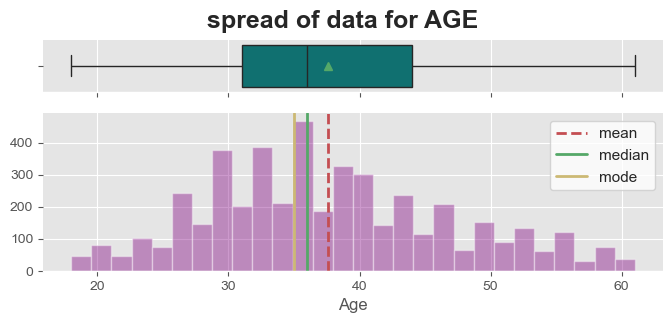

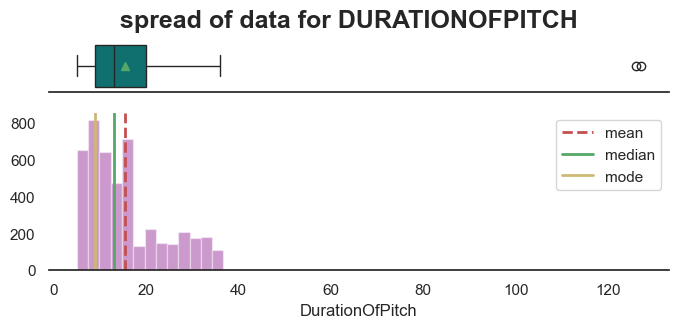

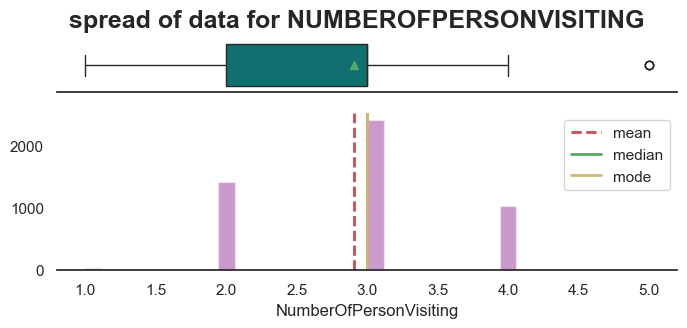

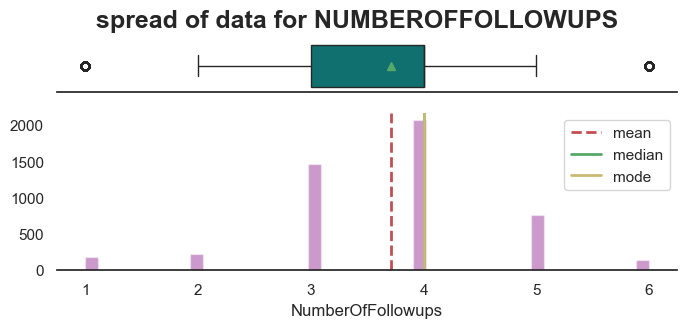

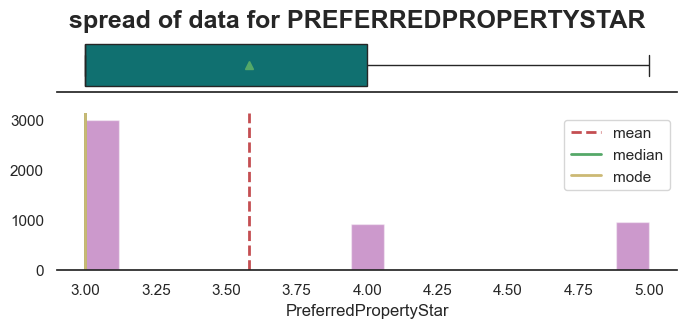

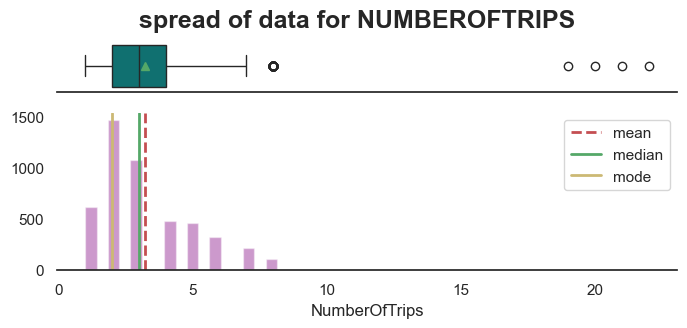

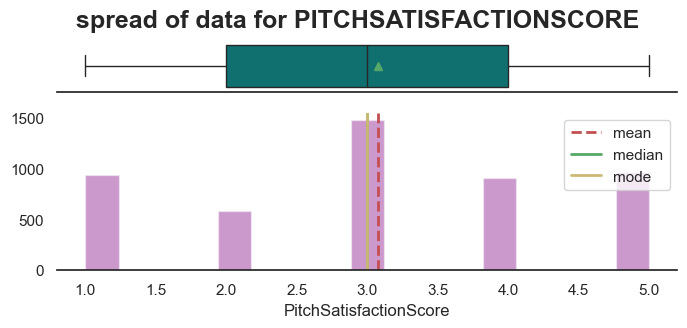

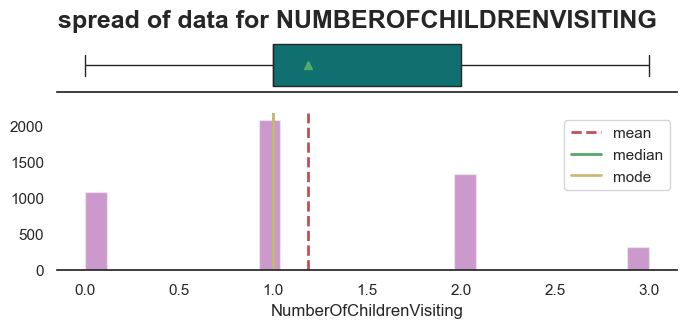

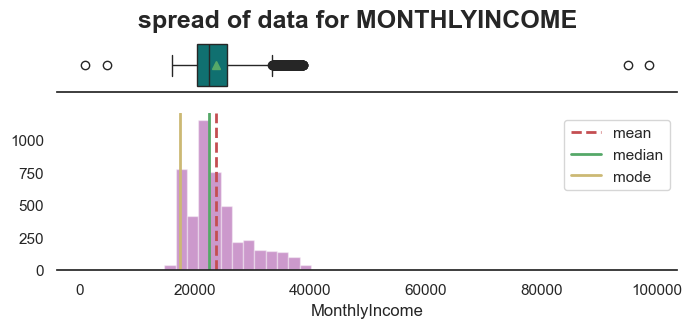

In [23]:
# loop for num_cols to plot each column
for i in range(len(num_cols)):
    dist_box(df_tour[num_cols[i]])

- Observations
1. Age is normally distrubted and doesn't have any outliers
2. Duration of pitch is Right skewed with some outliers greater than 120 .Need to see if this are to be treated.
3. Number of visitors is usually 3 with a outlier of 5.
4. Average number of folows up are 4 with extreme of 6
5. Number of trips is right skewed with some outliers where trips are greater than 17.
6. Monthly income is Right skewed. and has some outlier as higher end.

### 7. Bivariate & Multivariate Analysis

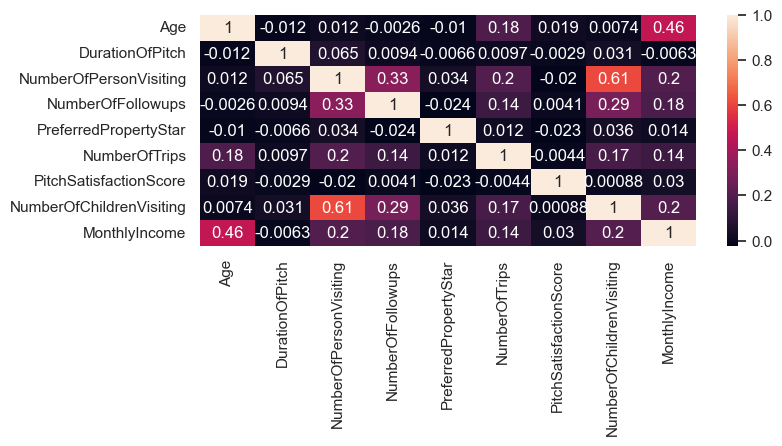

In [24]:
sn.set_palette(sn.color_palette("Set2", 8))
plt.figure(figsize=(8,3))
sn.heatmap(df_tour[num_cols].corr(),annot=True) # annot: This argument stands for "annotation." 
plt.show()                           # It determines whether to add annotations (text labels) to the heatmap cells.

- Observations

1. Monthlyincome and Age has weak correlation
2. Number of children visiting and number of person vsiting has correlation as expected.
3. Numberof follow up and number of person vsiting has very weak correlation.¶

### 7. Missing value Detection and Treatment

In [25]:
df_tour.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Occupation                    0
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
Incomebin                   233
dtype: int64

In [26]:
df_tour.TypeofContact.value_counts()

TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64

In [27]:
df_tour.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4888 entries, 0 to 4887
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   ProdTaken                 4888 non-null   category
 1   Age                       4662 non-null   float64 
 2   TypeofContact             4863 non-null   category
 3   CityTier                  4888 non-null   category
 4   DurationOfPitch           4637 non-null   float64 
 5   Occupation                4888 non-null   category
 6   Gender                    4888 non-null   category
 7   NumberOfPersonVisiting    4888 non-null   int64   
 8   NumberOfFollowups         4843 non-null   float64 
 9   ProductPitched            4888 non-null   category
 10  PreferredPropertyStar     4862 non-null   float64 
 11  MaritalStatus             4888 non-null   category
 12  NumberOfTrips             4748 non-null   float64 
 13  Passport                  4888 non-null   catego

filling null values in each comuln

In [28]:
# filling null values in Typeofcontact column using mode()
df_tour['TypeofContact']=df_tour['TypeofContact'].fillna(df_tour['TypeofContact'].mode()[0])

In [29]:
df_tour.TypeofContact.isnull().sum()

0

In [30]:
# filling null values in NumberOfFollowups column using median
df_tour['NumberOfFollowups']=df_tour['NumberOfFollowups'].fillna(df_tour['NumberOfFollowups'].median())

In [31]:
df_tour.NumberOfFollowups.isnull().sum()

0

In [32]:
# filling null values in NumberOfFollowups column using median
df_tour['DurationOfPitch']=df_tour['DurationOfPitch'].fillna(df_tour['DurationOfPitch'].median())
df_tour['Age']=df_tour['Age'].fillna(df_tour['Age'].median())
df_tour['NumberOfTrips']=df_tour['NumberOfTrips'].fillna(df_tour['NumberOfTrips'].median())
df_tour['MonthlyIncome']=df_tour['MonthlyIncome'].fillna(df_tour['MonthlyIncome'].median())
df_tour['PreferredPropertyStar']=df_tour['PreferredPropertyStar'].fillna(df_tour['PreferredPropertyStar'].median())

In [33]:
# Assuming children visited is missing because no children
# accompanied these customers so we will fill the missing values with 0
df_tour['NumberOfChildrenVisiting']=df_tour['NumberOfChildrenVisiting'].fillna(0)

In [34]:
df_tour['Agebin']=pd.cut(df_tour['Age'],bins=[18,25,31,40,50,65],labels=['18-25','26-30','31-40','41-50','51-65'])
df_tour['Incomebin'] = pd.cut(df_tour['MonthlyIncome'], bins = [0,15000,20000, 25000, 30000,35000,40000,45000,50000,100000], 
                              labels = ['<15000', '<20000', '<25000', '<30000','<35000','<40000','<45000','<50000','<100000'])

In [35]:
df_tour.isnull().sum()

ProdTaken                    0
Age                          0
TypeofContact                0
CityTier                     0
DurationOfPitch              0
Occupation                   0
Gender                       0
NumberOfPersonVisiting       0
NumberOfFollowups            0
ProductPitched               0
PreferredPropertyStar        0
MaritalStatus                0
NumberOfTrips                0
Passport                     0
PitchSatisfactionScore       0
OwnCar                       0
NumberOfChildrenVisiting     0
Designation                  0
MonthlyIncome                0
Incomebin                    0
Agebin                      14
dtype: int64

In [36]:
df_tour['Agebin']=df_tour['Agebin'].fillna(df_tour['Agebin'].mode()[0])

In [37]:
df_tour.isnull().sum().sum()

0

### 8.Split the dataset
Based on the information provided, i assume that Customer interaction data will not be available for new and potiental customers so dropping columns related to customer interaction

In [38]:
x = df_tour.drop(['ProdTaken','PitchSatisfactionScore','ProductPitched',
                  'NumberOfFollowups','DurationOfPitch','Agebin','Incomebin'],axis=1)

# convert categorical columns  into one hot encoding
x= pd.get_dummies(x,drop_first=True)
y = df_tour['ProdTaken']

In [39]:
# split data into train and test into 70:30 ratio
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=1)
x_train.shape,y_train.shape

((3421, 22), (3421,))

### 9.Buliding models
We'll fit Decision Tree and BaggingClassifier and Randomforest models on the train data and observe their performance

In [40]:
# define empty list to add train and test results
acc_train=[]
acc_test =[]

recall_train =[]
recall_test =[]

percesion_train=[]
percison_test =[]

f1_score_train =[]
f1_score_test =[]

def add_score_model(score):
     '''add score of modelto list'''
     acc_train.append(score["Train Accuracy"])
     acc_test.append(score["Test Accuracy"])
     recall_train.append(score["Train Recall"])
     recall_test.append(score["Test recall"])
     percesion_train.append(score["Train prection"])
     percison_test.append(score["Test Precision"])
     f1_score_train.append(score["Train F1 score"])
     f1_score_test.append(score["Test F1 score"])

In [41]:
# function to calculate matrix score
def score_matrix (model,x_train,x_test,y_train,y_test):
    score_dict ={}
    pred_train =np.round(model.predict(x_train))
    pred_test =np.round(model.predict(x_test))

    train_acc = accuracy_score(y_train,pred_train)
    test_acc = accuracy_score(y_test,pred_test)

    train_recall=recall_score(y_train,pred_train)
    test_recall = recall_score(y_test,pred_test)

    train_precision=precision_score(y_train,pred_train)
    test_precision = precision_score(y_test,pred_test)

    train_f1=f1_score(y_train,pred_train)
    test_f1 = f1_score(y_test,pred_test)

    score_dict.update({"Train Accuracy":train_acc,"Test Accuracy":test_acc,
                   "Train Recall": train_recall,"Test recall":test_recall,
                   "Train prection":train_precision,"Test Precision":test_precision,
                   "Train F1 score":train_f1,"Test F1 score":test_f1})

    return score_dict

#### Decsion Tree
 

In [42]:
dtree = DecisionTreeClassifier(random_state=1,class_weight={0:0.20, 1:0.80})
dtree.fit(x_train,y_train)

# class_weight={0:0.20, 1:0.80}: This assigns weights to different classes. In this case,
# there are two classes (represented by 0 and 1).
# Class 0 gets a weight of 0.2.
# Class 1 gets a weight of 0.8.
# Why weights? By giving a higher weight (0.8) to class 1 (let's say spam), 
# the model pays more attention to learning from the scarcer spam examples during training. 
# This is because the more frequent non-spam examp
# (class 0 with weight 0.2) already have a strong influence on the model's learning.

DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, random_state=1)

In [43]:
Tree_score_model =score_matrix(dtree,x_train,x_test,y_train,y_test)
Tree_score_model

{'Train Accuracy': 1.0,
 'Test Accuracy': 0.8650306748466258,
 'Train Recall': 1.0,
 'Test recall': 0.6081081081081081,
 'Train prection': 1.0,
 'Test Precision': 0.6870229007633588,
 'Train F1 score': 1.0,
 'Test F1 score': 0.6451612903225806}

In [44]:
add_score_model(Tree_score_model)

- Observation

High Training Accuracy (1.0) vs. Lower Test Accuracy (0.865): This suggests the model perfectly captured the patterns in the training data, but it's not generalizing well to unseen data (test data).

Decision tree is overfitting the training data as there is lot of disparity between test and train.Recall score is also not that high-

#### Bagging classifier

In [45]:
Bagging_calssifier = BaggingClassifier(random_state=1,verbose=1)
Bagging_calssifier.fit(x_train,y_train)

BaggingClassifier(random_state=1, verbose=1)

In [46]:
bagging_score = score_matrix(Bagging_calssifier,x_train ,x_test,y_train,y_test)
bagging_score

{'Train Accuracy': 0.9915229465068693,
 'Test Accuracy': 0.8882072256305386,
 'Train Recall': 0.9567307692307693,
 'Test recall': 0.5337837837837838,
 'Train prection': 0.996661101836394,
 'Test Precision': 0.8586956521739131,
 'Train F1 score': 0.9762878168438267,
 'Test F1 score': 0.6583333333333333}

In [47]:
add_score_model(bagging_score)

- Observation

Bagging is still overfitting the training data , Recall score has decreased for test data

#### Random Froest 

In [48]:
rf_estimator = RandomForestClassifier(random_state=1)
rf_estimator.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [49]:
score_list_rf= score_matrix(rf_estimator,x_train,x_test,y_train,y_test)
add_score_model(score_list_rf)

In [50]:
score_list_rf

{'Train Accuracy': 1.0,
 'Test Accuracy': 0.8725289706884799,
 'Train Recall': 1.0,
 'Test recall': 0.4358108108108108,
 'Train prection': 1.0,
 'Test Precision': 0.8657718120805369,
 'Train F1 score': 1.0,
 'Test F1 score': 0.5797752808988764}

Random forest is also overfitting the traning data

#### Adaboost

In [51]:
adboost =AdaBoostClassifier(random_state=1)
adboost.fit(x_train,y_train)


e:\anaconda\envs\new\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(random_state=1)

In [52]:
adboost_scors =score_matrix(adboost,x_train,x_test,y_train,y_test)
adboost_scors

{'Train Accuracy': 0.8439052908506285,
 'Test Accuracy': 0.830947511929107,
 'Train Recall': 0.27403846153846156,
 'Test recall': 0.2635135135135135,
 'Train prection': 0.6785714285714286,
 'Test Precision': 0.7222222222222222,
 'Train F1 score': 0.3904109589041096,
 'Test F1 score': 0.38613861386138615}

In [53]:
add_score_model(adboost_scors)

#### Gradient Boost

In [54]:
gbc = GradientBoostingClassifier(random_state=1)
gbc.fit(x_train,y_train)

GradientBoostingClassifier(random_state=1)

In [55]:
gbc_scors = score_matrix(gbc,x_train,x_test,y_train,y_test)
gbc_scors

{'Train Accuracy': 0.8827828120432623,
 'Test Accuracy': 0.8486707566462167,
 'Train Recall': 0.42628205128205127,
 'Test recall': 0.33783783783783783,
 'Train prection': 0.86084142394822,
 'Test Precision': 0.7936507936507936,
 'Train F1 score': 0.5702036441586281,
 'Test F1 score': 0.47393364928909953}

In [56]:
add_score_model(gbc_scors)

#### XGBoost

In [57]:
xgb = XGBClassifier(random_state=1,eval_metric='logloss')
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=1, ...)

In [58]:
xgb_scors = score_matrix(xgb,x_train,x_test,y_train,y_test)
xgb_scors

{'Train Accuracy': 0.9929845074539608,
 'Test Accuracy': 0.8943421949556919,
 'Train Recall': 0.9663461538461539,
 'Test recall': 0.6047297297297297,
 'Train prection': 0.995049504950495,
 'Test Precision': 0.8248847926267281,
 'Train F1 score': 0.9804878048780488,
 'Test F1 score': 0.6978557504873294}

XGboost seems to overfit. To get more generalized model, we can be look into tuning XGboost with different parameters.